In [55]:
import torch
import torch.distributions as dist
from torch.distributions import MixtureSameFamily, Categorical, Normal
import matplotlib.pyplot as plt

In [34]:
a=torch.normal(10, 3, size=(10000,))
b=torch.normal(30, 6, size=(10000,))

<function matplotlib.pyplot.show(close=None, block=None)>

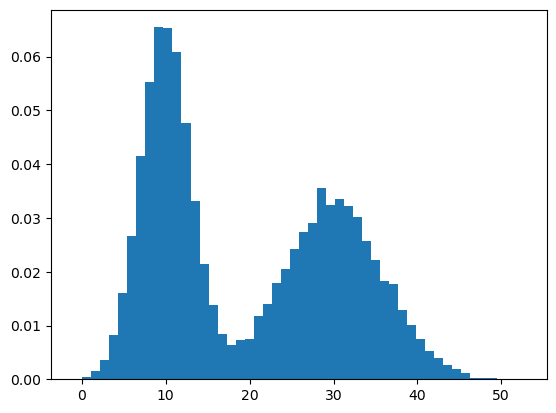

In [45]:
c=torch.cat((a,b))
plt.hist(c,bins=50,density=True)
plt.show

Mean:  298.05218505859375 Std dev:  108.39999389648438


<function matplotlib.pyplot.show(close=None, block=None)>

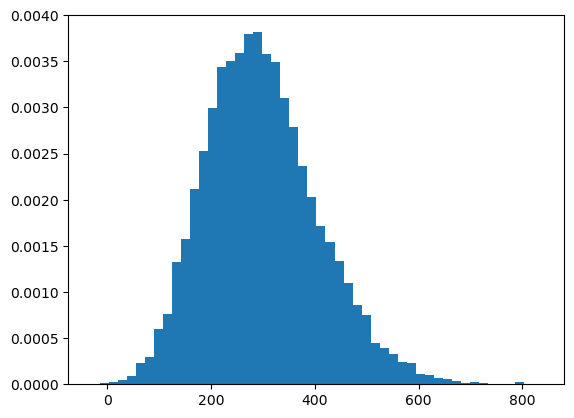

In [46]:
d=a*b
print('Mean: ',torch.std_mean(d)[1].item(),'Std dev: ',torch.std_mean(d)[0].item())
plt.hist(d,bins=50,density=True)
plt.show

In [67]:
dist1 = Normal(loc=torch.tensor([10.0,30.0]), scale=torch.tensor([3.0,6.0]))

mix = Categorical(probs=torch.tensor([0.5, 0.5]))
bimodal_dist = MixtureSameFamily(mix, dist1)

inputs=torch.rand(20000)


In [91]:
samples = torch.zeros_like(inputs)
for i in range(20000):
    samples[i] = torch.searchsorted(bimodal_dist.cdf(torch.linspace(0,50,50)), inputs[i], right=True).float()

<function matplotlib.pyplot.show(close=None, block=None)>

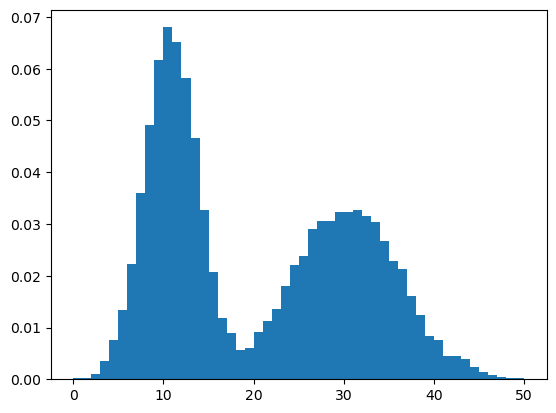

In [92]:
plt.hist(samples,bins=50,density=True)
plt.show

torch.Size([50])


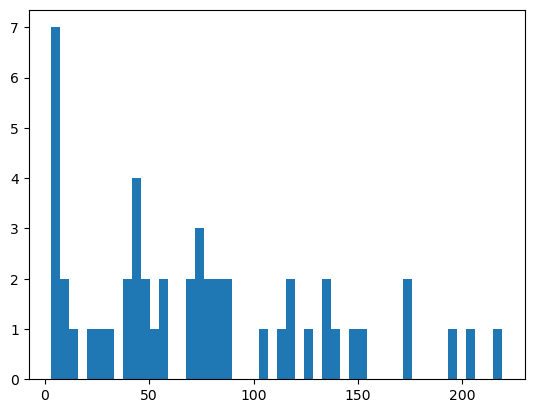

In [93]:
#differences
# plt.hist(torch.abs(torch.histogram(c, bins=50)-torch.histogram(samples, bins=50)),bins=50)
# plt.show()
x=torch.histogram(c, bins=50)[0]
y=torch.histogram(samples, bins=50)[0]
z=torch.abs(x-y)
print(z.shape)
plt.hist(z,bins=50)
plt.show()